<a href="https://colab.research.google.com/github/TheRudransh/Colab_Notebook/blob/main/ML_PracticeNotebook_Rudransh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Lab Notebook
### **Practical Title:** Housing Price Prediction
### **Student Name:** Rudransh Garg
### **Roll No:**  NDU202400212
### **Date:** 11/10/2025



# **1. Loading the library**

In [1]:
#Importing the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the ML Library
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score,
                             mean_absolute_error, mean_squared_error, r2_score,
                             confusion_matrix, ConfusionMatrixDisplay,
                             RocCurveDisplay, PrecisionRecallDisplay)

# 2. Loading the Dataset and analyzing it

In [2]:
#laoding the file from github

url = "https://raw.githubusercontent.com/aimlnielitropar/datasets/refs/heads/main/housing.csv"
df = pd.read_csv(url)
df.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
df['ocean_proximity'].unique()
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#finding the null value
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [6]:
df.shape

(20640, 10)

In [7]:
df.describe(include = "all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [8]:
print(df.shape)
print(df.info())
print(df.describe(include = "all"))

(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
           longitude      latitude  housing_median_age   total_rooms  \
count   20640.000000  20640.000000        20640.000000  20640.000000   
unique           NaN           NaN                 NaN           NaN   
top              N

In [9]:
#filling the missing values
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [10]:
#Finding the duplicate
print(df.duplicated().sum())

0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
'''from google.colab import files

# Save cleaned data to a CSV file
df.to_csv('cleaned_data_mean.csv', index=False)

# Download it directly to your computer
files.download('cleaned_data_mean.csv')'''


"from google.colab import files\n\n# Save cleaned data to a CSV file\ndf.to_csv('cleaned_data_mean.csv', index=False)\n\n# Download it directly to your computer\nfiles.download('cleaned_data_mean.csv')"

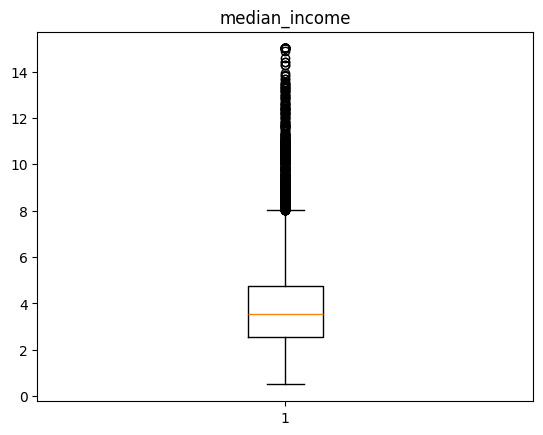

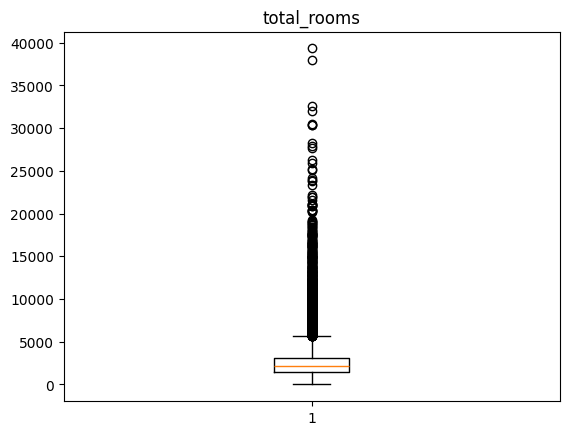

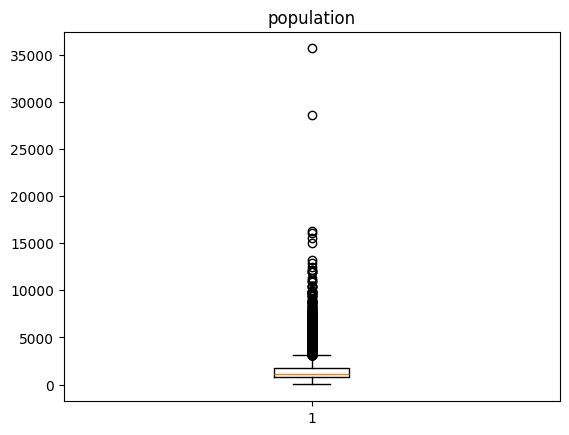

In [13]:
#graph before applying the capping

cols_to_check = ('median_income','total_rooms','population')

for cols in cols_to_check:
  plt.boxplot(df[cols])
  plt.title(cols)
  plt.show()

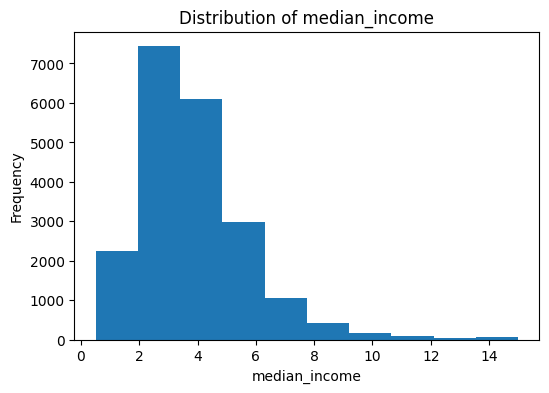

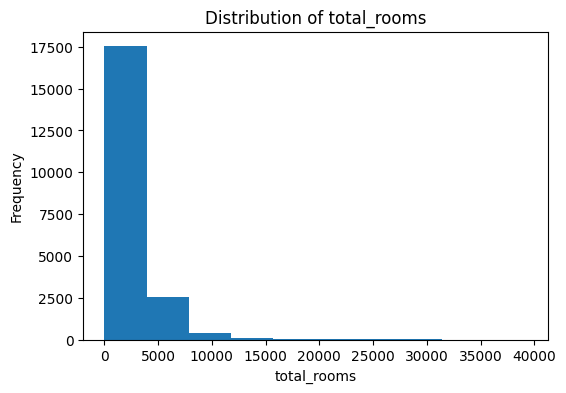

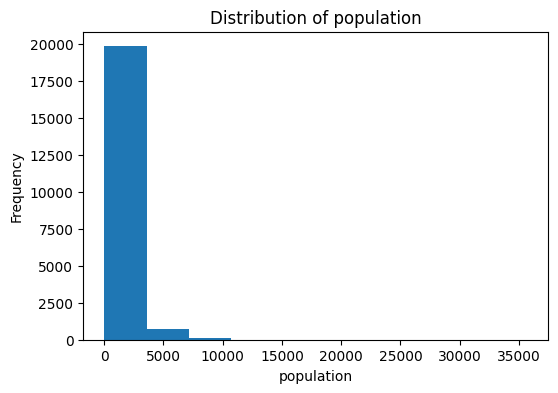

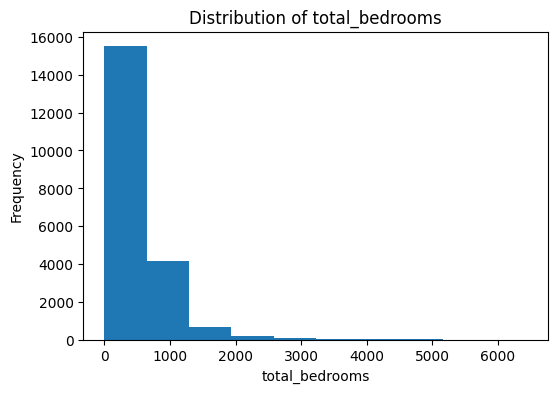

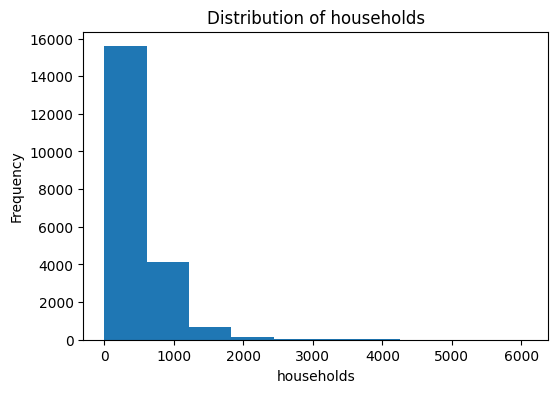

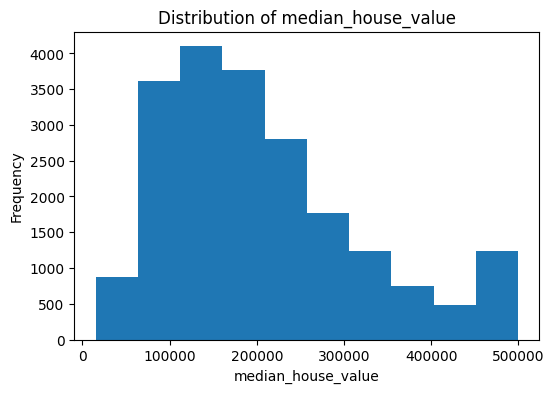

In [14]:
cols_to_plot = ['median_income','total_rooms','population',
                'total_bedrooms','households','median_house_value']

for col in cols_to_plot:
  plt.figure(figsize=(6,4))
  plt.hist(df[col])
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [15]:
# @title
#Applying the Outlier Capping
def cap_outlier(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  df[col] = np.where(df[col] > upper_bound, upper_bound,
                     np.where(df[col] < lower_bound, lower_bound, df[col]))
  return df

cols_to_cap = ['total_rooms','total_bedrooms','population',
                 'households','median_income','median_house_value']

for col in cols_to_cap:
    df = cap_outlier(df,col)

print("You did it bro ✌🏻")

You did it bro ✌🏻


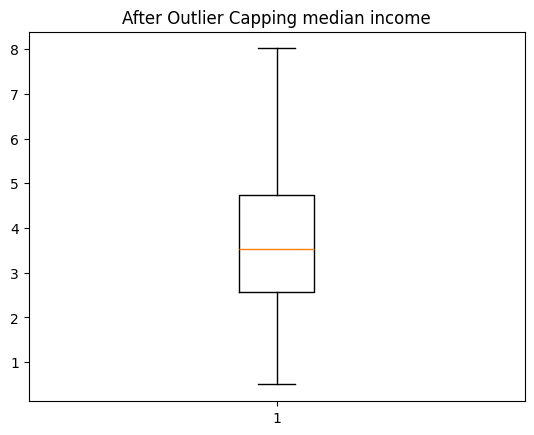

In [16]:
#plot a graph to check outlier capping

plt.boxplot(df['median_income'])
plt.title('After Outlier Capping median income')
plt.show()


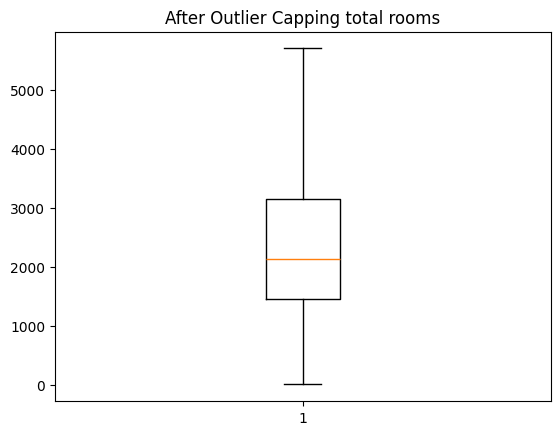

In [17]:
#graph after outlier of total_rooms

plt.boxplot(df['total_rooms'])
plt.title('After Outlier Capping total rooms')
plt.show()

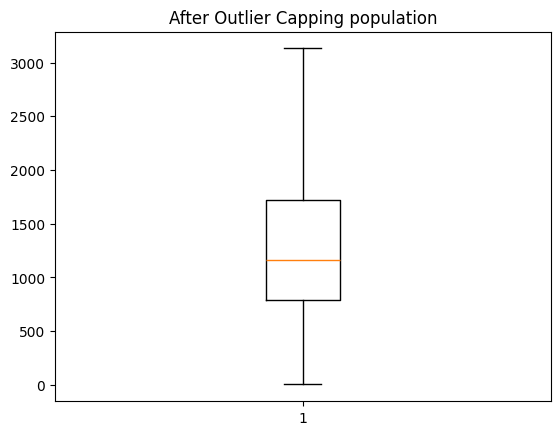

In [18]:
#graph after outlier of popualtion

plt.boxplot(df['population'])
plt.title('After Outlier Capping population')
plt.show()

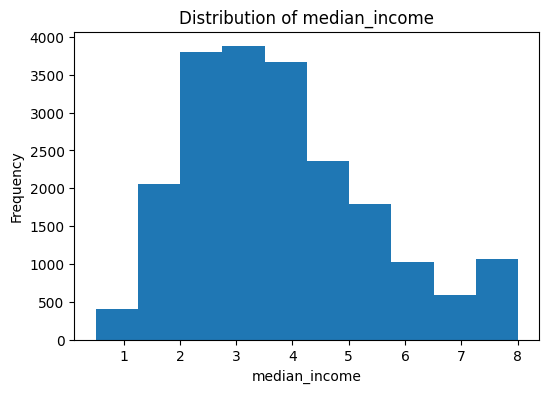

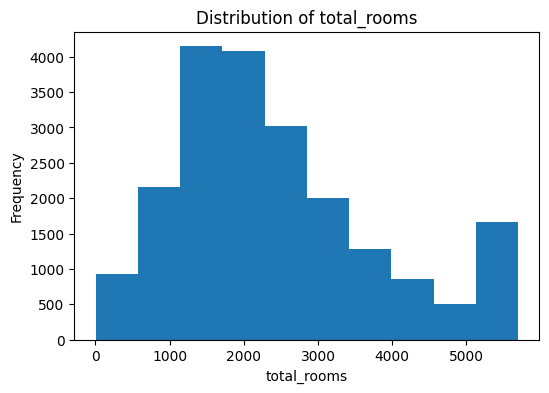

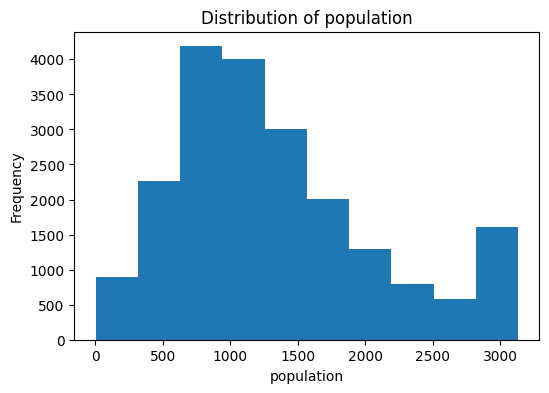

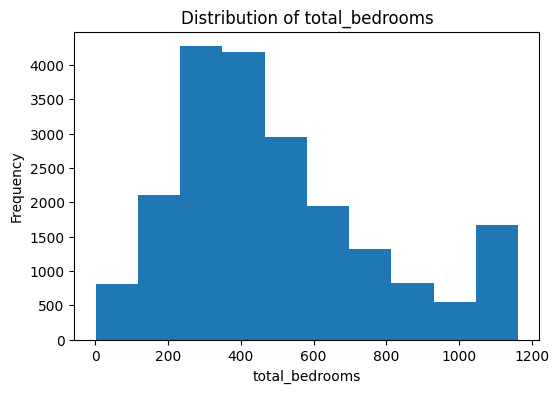

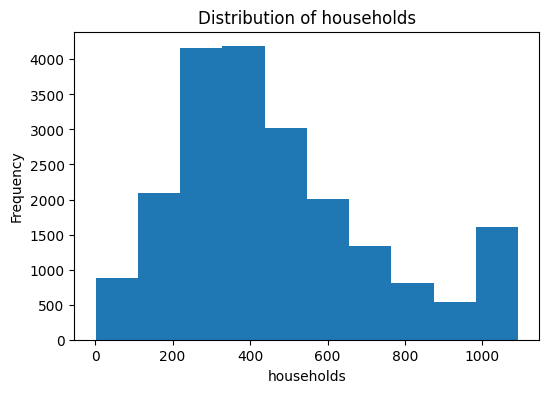

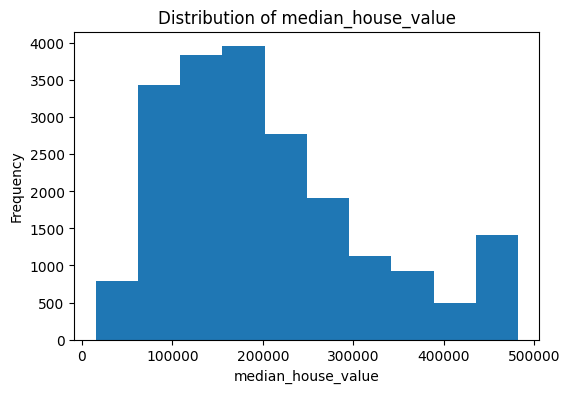

In [19]:
#making the histrograph

cols_to_plot = ['median_income','total_rooms','population',
                'total_bedrooms','households','median_house_value']

for col in cols_to_plot:
  plt.figure(figsize=(6,4))
  plt.hist(df[col])
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

<Axes: >

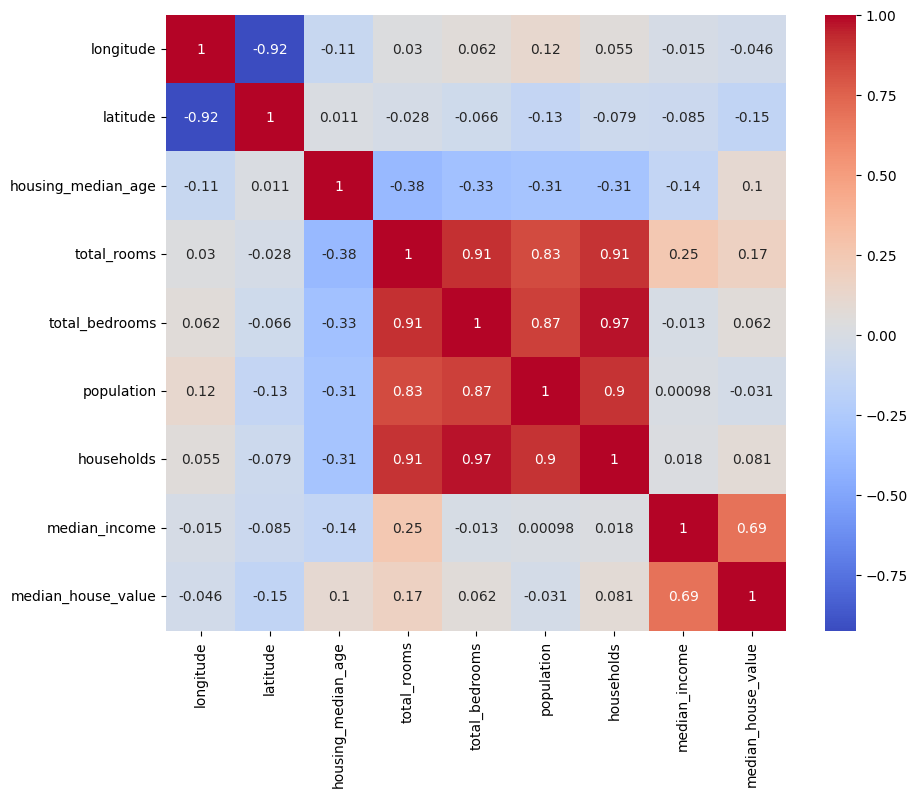

In [20]:
import numpy as np
#making correlatrion heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,cmap='coolwarm')

In [21]:
#Encoding of ocean_proximity

le_ocean_proximity = LabelEncoder()
df['ocean_proximity'] = le_ocean_proximity.fit_transform(df['ocean_proximity'])
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,3
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,3
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,3
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,3
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,3
5,-122.25,37.85,52.0,919.000,213.0,413.0,193.0,4.036800,269700.0,3
6,-122.25,37.84,52.0,2535.000,489.0,1094.0,514.0,3.659100,299200.0,3
7,-122.25,37.84,52.0,3104.000,687.0,1157.0,647.0,3.120000,241400.0,3
8,-122.26,37.84,42.0,2555.000,665.0,1206.0,595.0,2.080400,226700.0,3
9,-122.25,37.84,52.0,3549.000,707.0,1551.0,714.0,3.691200,261100.0,3


In [22]:
print("Ocean Proximity mapping: ", dict(zip(le_ocean_proximity.classes_, le_ocean_proximity.transform(le_ocean_proximity.classes_))))

Ocean Proximity mapping:  {'<1H OCEAN': np.int64(0), 'INLAND': np.int64(1), 'ISLAND': np.int64(2), 'NEAR BAY': np.int64(3), 'NEAR OCEAN': np.int64(4)}


In this dataset feature engineeing is not that much required so I prefer to drop it and continue to perfrom Test and training the dataset

In [23]:
#Spliting the dataset

X = df.drop('median_house_value',axis=1)
y = df['median_house_value']

In [24]:
#Checking is data split perfectly or not
X.shape, y.shape

((20640, 9), (20640,))

In [25]:
#Test and train
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [26]:
#Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling completed!!!!!!!")

Scaling completed!!!!!!!


In [27]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,3
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,3
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,3
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,3
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,3
5,-122.25,37.85,52.0,919.000,213.0,413.0,193.0,4.036800,269700.0,3
6,-122.25,37.84,52.0,2535.000,489.0,1094.0,514.0,3.659100,299200.0,3
7,-122.25,37.84,52.0,3104.000,687.0,1157.0,647.0,3.120000,241400.0,3
8,-122.26,37.84,42.0,2555.000,665.0,1206.0,595.0,2.080400,226700.0,3
9,-122.25,37.84,52.0,3549.000,707.0,1551.0,714.0,3.691200,261100.0,3


In [28]:
#Now training the model

lr = LinearRegression()
lr.fit(X_train_scaled,y_train)


LinearRegression()

In [29]:
y_pred_lr = lr.predict(X_test_scaled)

In [30]:
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression R2 Score: 0.6177322828571021
MAE: 51380.429832599155
RMSE: 69521.40229163312


In [31]:
#Using the Random Forest Regressor

rf = RandomForestRegressor(random_state= 42)
rf.fit(X_train_scaled,y_train)

y_pred_rf = rf.predict(X_test_scaled)


print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R2 Score: 0.8115600826667791
MAE: 31663.282474563955
RMSE: 48811.38880094759


In [32]:
# Using KNN model to explore more

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [33]:
y_pred_knn = knn.predict(X_test_scaled)

In [34]:
print("KNN R2 Score:", r2_score(y_test, y_pred_knn))
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))


KNN R2 Score: 0.7106673281739386
MAE: 40990.281153100776
RMSE: 60483.017609635965


In [35]:
# Using Decision Tree classification

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [36]:
y_pred_dt = dt.predict(X_test_scaled)

print("R2 Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


R2 Score: 0.6531414032833465
MAE: 42215.08042635659
RMSE: 66223.31905132947


In [38]:
# Just to explore GridSearchCV

#from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [10, 20, None],
#    'min_samples_split': [2, 5, 10]
#}

#grid = GridSearchCV(RandomForestRegressor(random_state=42),
    #                param_grid,
   #                 cv=3,
  #                  scoring='r2',
 #                   n_jobs=-1)
#
#grid.fit(X_train_scaled, y_train)

#print("Best Params:", grid.best_params_)
#print("Best Score:", grid.best_score_)


<function matplotlib.pyplot.show(close=None, block=None)>

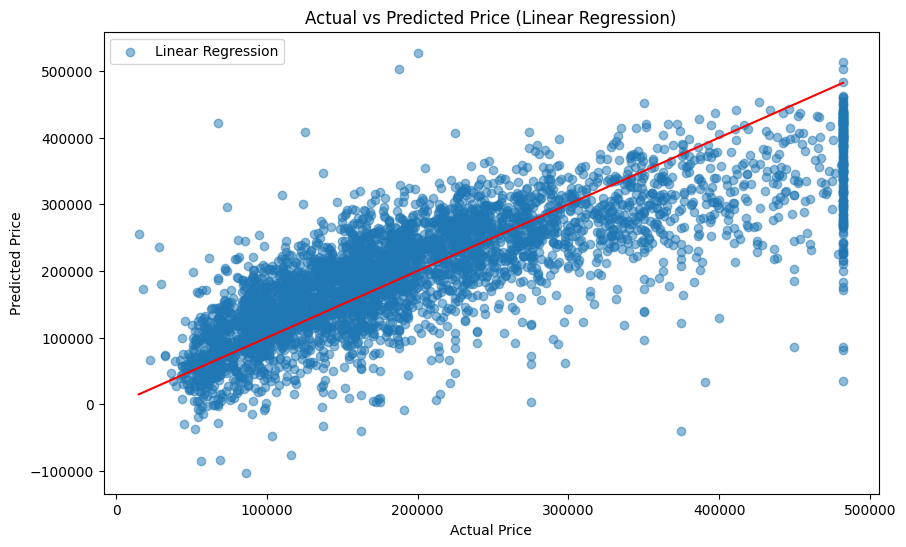

In [39]:
#ploting the graph of LR actual vs predicted

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

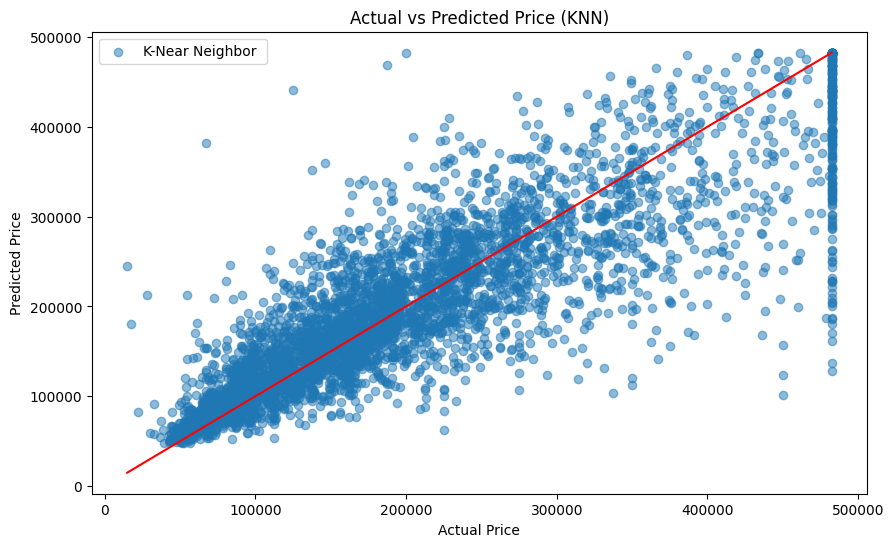

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_knn, label='K-Near Neighbor ', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (KNN)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

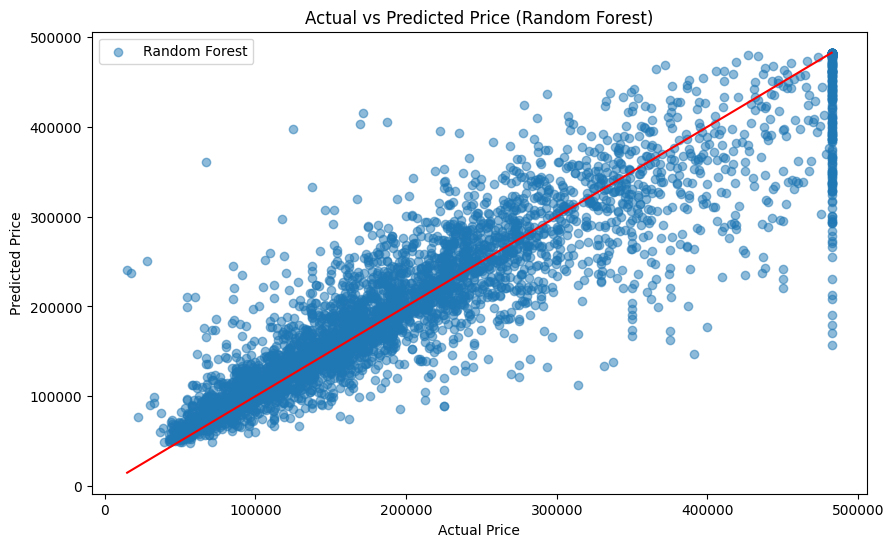

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

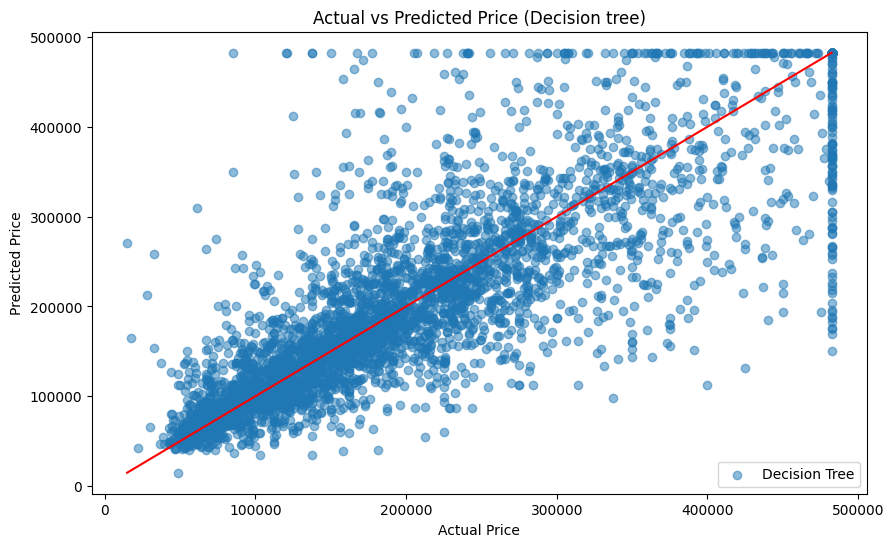

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_dt, label='Decision Tree', alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Decision tree)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.legend()
plt.show

In [43]:
def predict_price(longitude, latitude, housing_median_age, total_rooms,
                  total_bedrooms, population, households, median_income,
                  ocean_proximity):

    # Put input into a DataFrame
    sample = pd.DataFrame([[
        longitude, latitude, housing_median_age, total_rooms,
        total_bedrooms, population, households, median_income,
        ocean_proximity
    ]], columns=X.columns)

    # Scale the sample
    sample_scaled = scaler.transform(sample)

    # Predict using best model (Random Forest)
    pred = rf.predict(sample_scaled)[0]

    return pred


In [44]:
price = predict_price(
    longitude=-122.23,
    latitude=37.88,
    housing_median_age=41,
    total_rooms=880,
    total_bedrooms=129,
    population=322,
    households=126,
    median_income=8.3252,
    ocean_proximity=4  # (NEAR OCEAN based on your label encoding)
)

print("Predicted House Price:", price)


Predicted House Price: 458988.125
